Nhập các thư viện cần thiết

In [169]:
import numpy as np  #1 Thư viện numpy giúp tạo mảng và thực hiện các phép toán số học cấp cao.

import pandas as pd #2 Thư viện pandas để đọc dữ liệu từ file CSV và xử lý dữ liệu dạng bảng.

import matplotlib.pyplot as plt #3 Thư viện matplotlib để tạo các đồ thị và biểu đồ. 

import seaborn as sns #4Thư viện seaborn giúp tạo các biểu đồ thống kê đẹp và dễ hiểu.

from sklearn import metrics #5 Thư viện metrics cung cấp các hàm đánh giá mô hình học máy.

from sklearn.model_selection import train_test_split #6 Dùng để chia dữ liệu thành tập huấn luyện và kiểm tra.

from sklearn.preprocessing import LabelEncoder #7 Cung cấp các công cụ để xử lý dữ liệu phân loại.

from xgboost import XGBRegressor  #8 Mô hình học máy XGBoost (Boosted trees) để dự đoán.

from sklearn.preprocessing import StandardScaler #9 Dùng để chuẩn hóa các giá trị dữ liệu.

from sklearn.ensemble import RandomForestRegressor #10 Mô hình học máy Random Forest để dự đoán.

import datetime #11 Cung cấp các công cụ làm việc với thời gian.

from pymongo import MongoClient #12 Thư viện MongoClient kết nối và làm việc với cơ sở dữ liệu MongoDB.

In [170]:
#Tải dữ liệu từ tệp CSV vào DataFrame của Pandas
big_mart_data = pd.read_csv(r'D:\Python\bai_cuoi_ky\Train.csv')


Thu thập và phân tích dữ liệu

In [171]:
# 5 hàng đầu tiên của tập dữ liệu
big_mart_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [172]:
# Số lượng hàng và cột
big_mart_data.shape

(8523, 12)

In [173]:
# một số thông tin về tập dữ liệu
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier: Mã sản phẩm
Item_Weight: Trọng lượng sản phẩm
Item_Fat_Content: Nội dung chất béo của sản phẩm
Item_Visibility: Độ hiển thị của sản phẩm
Item_Type: Loại sản phẩm
Item_MRP: Giá bán lẻ của sản phẩm
Outlet_Identifier: Mã cửa hàng
Outlet_Establishment_Year: Năm thành lập cửa hàng
Outlet_Size: Kích thước cửa hàng
Outlet_Location_Type: Loại vị trí cửa hàng
Outlet_Type: Loại cửa hàng
Item_Outlet_Sales: Doanh số bán hàng của sản phẩm tại cửa hàng


các đặc trung phân loại

Item_Identifier: Mã sản phẩm
Item_Fat_Content: Nội dung chất béo của sản phẩm
Item_Type: Loại sản phẩm
Outlet_Identifier: Mã cửa hàng
Outlet_Size: Kích thước cửa hàng
Outlet_Location_Type: Loại vị trí cửa hàng
Outlet_Type: Loại cửa hàng

In [174]:
missing_values = big_mart_data.isnull().sum()
print(missing_values)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Xử lý các giá trị bị thiếu

Mean --> average

Mode --> more repeated value

In [175]:
# giá trị trung bình của cột 'Item_Weight
average_weight_value = big_mart_data['Item_Weight'].mean()
print(average_weight_value)

12.857645184135976


In [176]:
# Điền các giá trị thiếu trong cột 'Item_Weight' bằng giá trị trung bình đã tính trước
big_mart_data.loc[big_mart_data['Item_Weight'].isna(), 'Item_Weight'] = average_weight_value

In [177]:
missing_values = big_mart_data.isnull().sum()
print(missing_values)

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [178]:
big_mart_data[:10]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [179]:
mode_of_outlet_size = big_mart_data.pivot_table(values ='Outlet_Size', columns ='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
# Tạo ra một bảng tổng hợp dạng pivot table từ dữ liệu big_mart_data. Bảng này sẽ hiển thị giá trị cần tính toán (Outlet_Size) dựa trên nhóm (Outlet_Type).
# Hàm tổng hợp (aggfunc) được sử dụng là mode (giá trị xuất hiện nhiều nhất). x.mode()[0] lấy giá trị phổ biến nhất (mode) từ dữ liệu nhóm.
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [180]:
missing_values = big_mart_data['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [181]:
# Tạo một Series 'miss_values' để đánh dấu các hàng có giá trị thiếu trong cột 'Outlet_Size'
miss_values = big_mart_data['Outlet_Size'].isnull()
  

In [182]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [183]:
big_mart_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


Xử lý giá trị không hợp lệ

In [184]:
# Tạo DataFrame để lưu các giá trị không hợp lệ
invalid_values = pd.DataFrame()

# 1. Kiểm tra cột Item_Weight (giá trị phải > 0 và không vượt quá 100)
invalid_values = pd.concat([invalid_values, big_mart_data[(big_mart_data['Item_Weight'] <= 0) | (big_mart_data['Item_Weight'] > 100)]])

# 2. Kiểm tra cột Item_Fat_Content (giá trị phải là 'Low Fat' hoặc 'Regular')
invalid_values = pd.concat([invalid_values, big_mart_data[~big_mart_data['Item_Fat_Content'].isin(['Low Fat', 'Regular'])]])

# 3. Kiểm tra cột Item_Visibility (giá trị phải nằm trong khoảng từ 0 đến 1)
invalid_values = pd.concat([invalid_values, big_mart_data[(big_mart_data['Item_Visibility'] < 0) | (big_mart_data['Item_Visibility'] > 1)]])

# 4. Kiểm tra cột Item_MRP (giá trị phải > 0)
invalid_values = pd.concat([invalid_values, big_mart_data[big_mart_data['Item_MRP'] <= 0]])

# 5. Kiểm tra cột Outlet_Establishment_Year (năm phải nằm trong khoảng hợp lệ, từ 1900 đến năm hiện tại)
current_year = 2024
invalid_values = pd.concat([invalid_values, big_mart_data[(big_mart_data['Outlet_Establishment_Year'] < 1900) | (big_mart_data['Outlet_Establishment_Year'] > current_year)]])

# 6. Kiểm tra cột Outlet_Size (giá trị phải là 'Small', 'Medium' hoặc 'High')
invalid_values = pd.concat([invalid_values, big_mart_data[~big_mart_data['Outlet_Size'].isin(['Small', 'Medium', 'High'])]])

# 7. Kiểm tra cột Item_Outlet_Sales (giá trị phải > 0)
invalid_values = pd.concat([invalid_values, big_mart_data[big_mart_data['Item_Outlet_Sales'] <= 0]])

# In ra các hàng có giá trị không hợp lệ
print("Các giá trị không hợp lệ trong dữ liệu:\n", invalid_values)


Các giá trị không hợp lệ trong dữ liệu:
      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
27             DRJ59    11.650000          low fat         0.019356   
45             FDM39     6.420000               LF         0.089499   
65             FDC46    17.700000               LF         0.195068   
74             NCZ18     7.825000          low fat         0.186357   
81             FDN04    11.800000              reg         0.014087   
...              ...          ...              ...              ...   
8391           FDV15    10.300000               LF         0.146172   
8404           DRH39    12.857645          low fat         0.000000   
8443           FDX15    17.200000               LF         0.156542   
8467           FDV31     9.800000               LF         0.000000   
8517           FDF53    20.750000              reg         0.083607   

                  Item_Type  Item_MRP Outlet_Identifier  \
27              Hard Drinks   39.1164          

In [185]:
# Kiểm tra số lượng các giá trị duy nhất trong cột 'Item_Fat_Content'
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [186]:
# Thay thế các giá trị trong cột 'Item_Fat_Content' để đồng nhất tên gọi
# 'low fat' và 'LF' sẽ được thay thế bằng 'Low Fat'
# 'reg' sẽ được thay thế bằng 'Regular'
big_mart_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

In [187]:
# Kiểm tra số lượng các giá trị duy nhất trong cột 'Item_Fat_Content'
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Đánh Labelling


In [188]:
# Tạo một đối tượng LabelEncoder để chuyển đổi các nhãn phân loại thành các giá trị số nguyên.
# Đối tượng này sẽ giúp mã hóa các cột phân loại trong dữ liệu
encoder = LabelEncoder()

In [189]:
# Mã hóa cột 'Item_Identifier' thành các giá trị số nguyên bằng cách sử dụng LabelEncoder.
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

# Mã hóa cột 'Item_Fat_Content' thành các giá trị số nguyên, giúp mô hình học máy xử lý dữ liệu phân loại.
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

# Mã hóa cột 'Item_Type' thành các giá trị số nguyên để sử dụng trong các mô hình học máy.
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

# Mã hóa cột 'Outlet_Identifier' thành các giá trị số nguyên.
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

# Mã hóa cột 'Outlet_Size' thành các giá trị số nguyên để dễ dàng xử lý trong mô hình.
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

# Mã hóa cột 'Outlet_Location_Type' thành các giá trị số nguyên.
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

# Mã hóa cột 'Outlet_Type' thành các giá trị số nguyên, giúp mô hình có thể hiểu được thông tin này.
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [190]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Xử lý giá trị noise
Dữ liệu hợp lệ={x∣Lower Bound≤x≤Upper Bound}
IQR=Q1-Q3


In [191]:
# Tính toán IQR cho cột 'Item_Weight'
Q1 = big_mart_data['Item_Weight'].quantile(0.25)
Q3 = big_mart_data['Item_Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc ra các giá trị ngoại lai
outliers = big_mart_data[(big_mart_data['Item_Weight'] < lower_bound) | (big_mart_data['Item_Weight'] > upper_bound)]

# Hiển thị các giá trị ngoại lai
print("Các giá trị ngoại lai trước khi xử lý:")
print(outliers)




Các giá trị ngoại lai trước khi xử lý:
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [192]:
# Loại bỏ các giá trị ngoại lai
big_mart_data = big_mart_data[(big_mart_data['Item_Weight'] >= lower_bound) & (big_mart_data['Item_Weight'] <= upper_bound)]

# Kiểm tra lại số lượng dữ liệu sau khi loại bỏ
print("\nDữ liệu sau khi loại bỏ giá trị ngoại lai:")
print(big_mart_data)




Dữ liệu sau khi loại bỏ giá trị ngoại lai:
      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0   

Chuẩn hóa dữ liệu
Standardization (Chuẩn hóa Z-score):
Z= (X−μ)/σ
X: Giá trị của dữ liệu.
μ: Trung bình của dữ liệu.
σ: Độ lệch chuẩn của dữ liệu.



Z= (X−μ)/σ
X: Giá trị của dữ liệu.
μ: Trung bình của dữ liệu.
σ: Độ lệch chuẩn của dữ liệu.

In [193]:
# Chuẩn hóa cột 'Item_MRP'
scaler = StandardScaler()
columns_to_scale = ['Item_MRP', 'Item_Visibility']  # danh sách các cột cần chuẩn hóa
big_mart_data[columns_to_scale] = scaler.fit_transform(big_mart_data[columns_to_scale])

In [194]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,-0.970732,4,1.747454,9,1999,1,0,1,3735.1380
1,8,5.92,1,-0.908111,14,-1.489023,3,2009,1,2,2,443.4228
2,662,17.50,0,-0.956917,10,0.010040,9,1999,1,0,1,2097.2700
3,1121,19.20,1,-1.281758,6,0.660050,0,1998,2,2,0,732.3800
4,1297,8.93,0,-1.281758,9,-1.399220,1,1987,0,2,1,994.7052


Xử lý dữ liệu imbalance

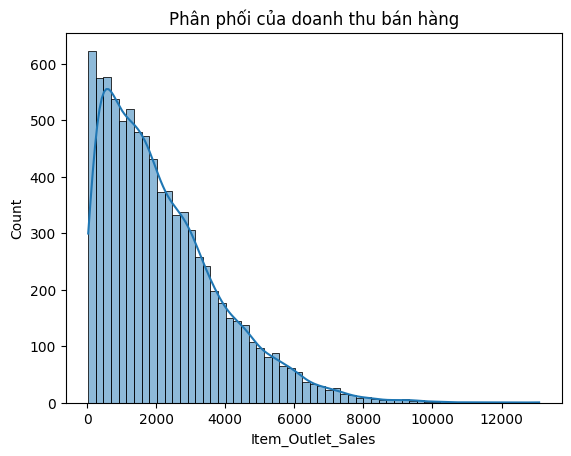

In [195]:
sns.histplot(big_mart_data['Item_Outlet_Sales'], kde=True)
plt.title('Phân phối của doanh thu bán hàng')
plt.show()

In [196]:
print(big_mart_data['Item_Outlet_Sales'].describe())


count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


In [197]:

# Áp dụng biến đổi logarit cho dữ liệu doanh thu
big_mart_data['Item_Outlet_Sales_log'] = np.log1p(big_mart_data['Item_Outlet_Sales'])


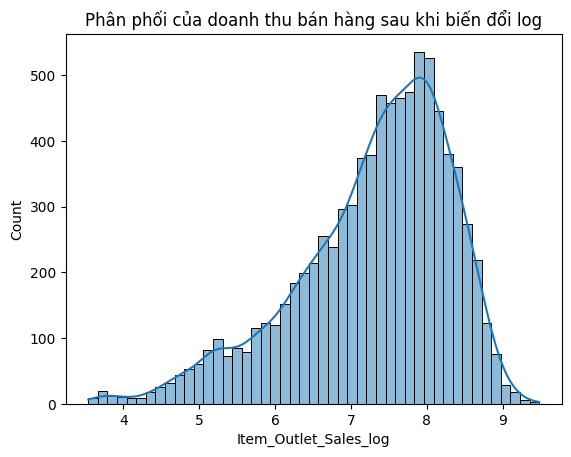

In [198]:
# Áp dụng biến đổi logarit cho dữ liệu doanh thu
big_mart_data['Item_Outlet_Sales_log'] = np.log1p(big_mart_data['Item_Outlet_Sales'])

# Kiểm tra lại phân phối sau khi biến đổi
sns.histplot(big_mart_data['Item_Outlet_Sales_log'], kde=True)
plt.title('Phân phối của doanh thu bán hàng sau khi biến đổi log')
plt.show()

In [199]:
# Kiểm tra thống kê mô tả trước và sau khi biến đổi logarit
print("Thống kê mô tả trước khi biến đổi:")
print(big_mart_data['Item_Outlet_Sales'].describe())

# Kiểm tra thống kê mô tả sau khi biến đổi logarit
print("\nThống kê mô tả sau khi biến đổi logarit:")
print(big_mart_data['Item_Outlet_Sales_log'].describe())


Thống kê mô tả trước khi biến đổi:
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

Thống kê mô tả sau khi biến đổi logarit:
count    8523.000000
mean        7.297863
std         1.015211
min         3.534854
25%         6.727728
50%         7.492945
75%         8.039898
max         9.479448
Name: Item_Outlet_Sales_log, dtype: float64


Xử lý dữ liệu đặc trưng

1.Tạo Đặc Trưng Mới

In [200]:
# Tạo cột Price_Per_Unit: Giả sử mỗi sản phẩm có 1 đơn vị
big_mart_data['Price_Per_Unit'] = big_mart_data['Item_MRP'] / big_mart_data['Item_Weight']



In [201]:
# Kiểm tra tên các cột trong DataFrame
print(big_mart_data.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Outlet_Sales_log',
       'Price_Per_Unit'],
      dtype='object')


In [202]:
# Lấy năm hiện tại tự động
current_year = datetime.datetime.now().year

# Tạo cột Outlet_Age: Tuổi của cửa hàng
big_mart_data['Outlet_Age'] = current_year - big_mart_data['Outlet_Establishment_Year']

3.Loại bỏ các cột không hữu ích (Feature Selection)

In [203]:
# Loại bỏ các cột không cần thiết
big_mart_data.drop(columns=['Outlet_Establishment_Year'], inplace=True)
# Danh sách các cột mong muốn giữ lại
columns_to_keep = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type', 
                   'Item_Outlet_Sales', 'Item_Outlet_Sales_log', 'Price_Per_Unit', 'Outlet_Age']

# Lọc các cột có sẵn trong DataFrame
existing_columns = [col for col in columns_to_keep if col in big_mart_data.columns]

# Giữ lại các cột có sẵn trong DataFrame
big_mart_data = big_mart_data[existing_columns]


In [204]:
# Tạo biến X chứa tất cả các đặc trưng (features) bằng cách loại bỏ cột 'Item_Outlet_Sales' khỏi DataFrame big_mart_data
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)

# Tạo biến Y chứa mục tiêu (target) là cột 'Item_Outlet_Sales'
Y = big_mart_data['Item_Outlet_Sales']


In [205]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Type  \
0                 156        9.300                 0          4   
1                   8        5.920                 1         14   
2                 662       17.500                 0         10   
3                1121       19.200                 1          6   
4                1297        8.930                 0          9   
...               ...          ...               ...        ...   
8518              370        6.865                 0         13   
8519              897        8.380                 1          0   
8520             1357       10.600                 0          8   
8521              681        7.210                 1         13   
8522               50       14.800                 0         14   

      Item_Outlet_Sales_log  Price_Per_Unit  Outlet_Age  
0                  8.225808        0.187898          25  
1                  6.096776       -0.251524          15  
2                  7.

In [206]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Phân tích dữ liệu

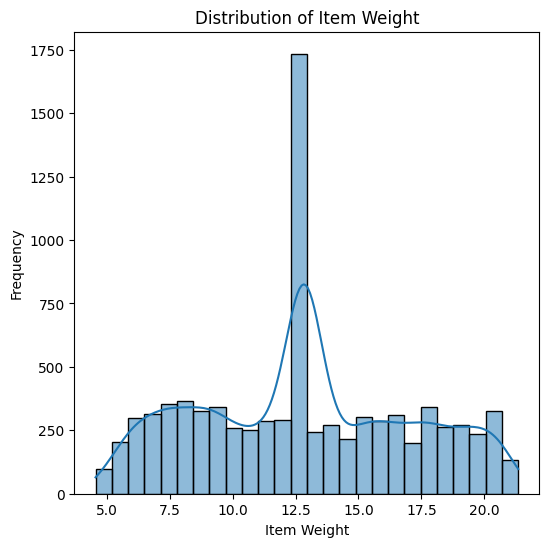

In [207]:
# Item_Weight distribution (Phân phối trọng lượng mặt hàng)
plt.figure(figsize=(6, 6))
sns.histplot(big_mart_data['Item_Weight'], kde=True)  # Thêm kde=True để hiển thị đường phân phối
plt.title('Distribution of Item Weight')  # Tiêu đề cho biểu đồ
plt.xlabel('Item Weight')  # Nhãn trục x
plt.ylabel('Frequency')  # Nhãn trục y
plt.show()


In [208]:
# Kiểm tra các cột trong DataFrame
print(big_mart_data.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Item_Outlet_Sales', 'Item_Outlet_Sales_log', 'Price_Per_Unit',
       'Outlet_Age'],
      dtype='object')


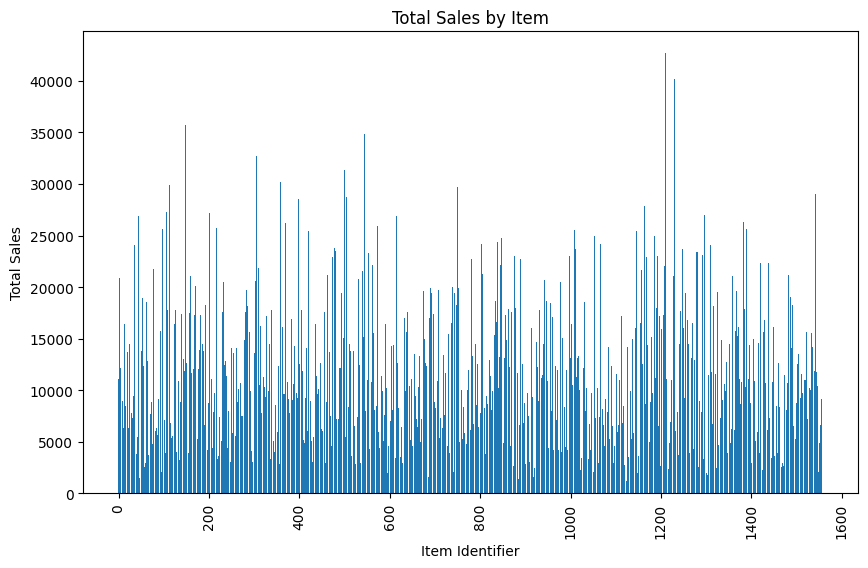

In [209]:
# Nhóm theo 'Item_Identifier' và tính tổng doanh thu cho từng mặt hàng
sales_by_item = big_mart_data.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().reset_index()

# Sắp xếp dữ liệu theo doanh thu để biểu đồ dễ nhìn
sales_by_item = sales_by_item.sort_values('Item_Outlet_Sales', ascending=False)

# Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(sales_by_item['Item_Identifier'], sales_by_item['Item_Outlet_Sales'])
plt.xlabel('Item Identifier')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item')
plt.xticks(rotation=90)
plt.show()



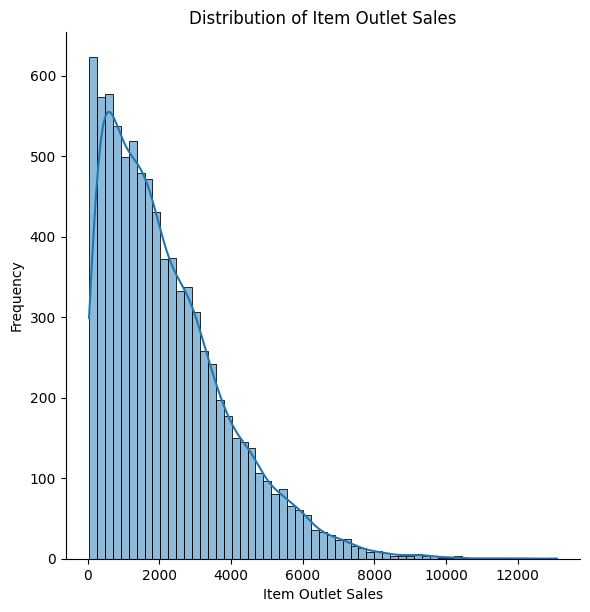

In [210]:
# Item Outlet Sales distribution (Phân phối doanh số bán hàng qua cửa hàng của mặt hàng)
sns.displot(big_mart_data['Item_Outlet_Sales'], kde=True, height=6, aspect=1)  # Thêm kde=True để hiển thị đường phân phối
plt.title('Distribution of Item Outlet Sales')  # Tiêu đề cho biểu đồ
plt.xlabel('Item Outlet Sales')  # Nhãn trục x
plt.ylabel('Frequency')  # Nhãn trục y
plt.show()


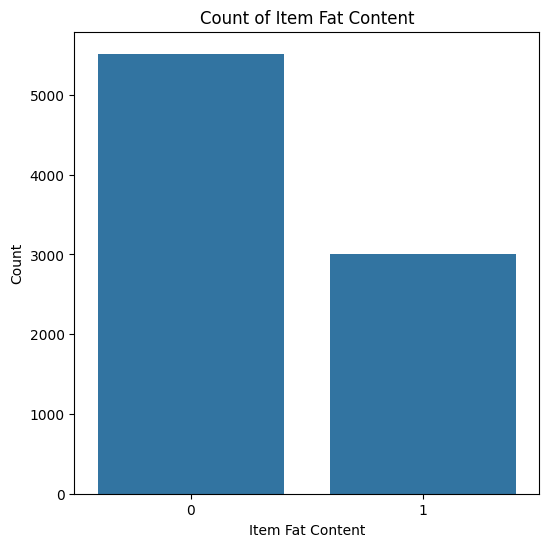

In [211]:
# Item Fat Content distribution (Phân phối hàm lượng chất béo của mặt hàng)
plt.figure(figsize=(6, 6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.title('Count of Item Fat Content')  # Tiêu đề cho biểu đồ
plt.xlabel('Item Fat Content')  # Nhãn trục x
plt.ylabel('Count')  # Nhãn trục y
plt.show()


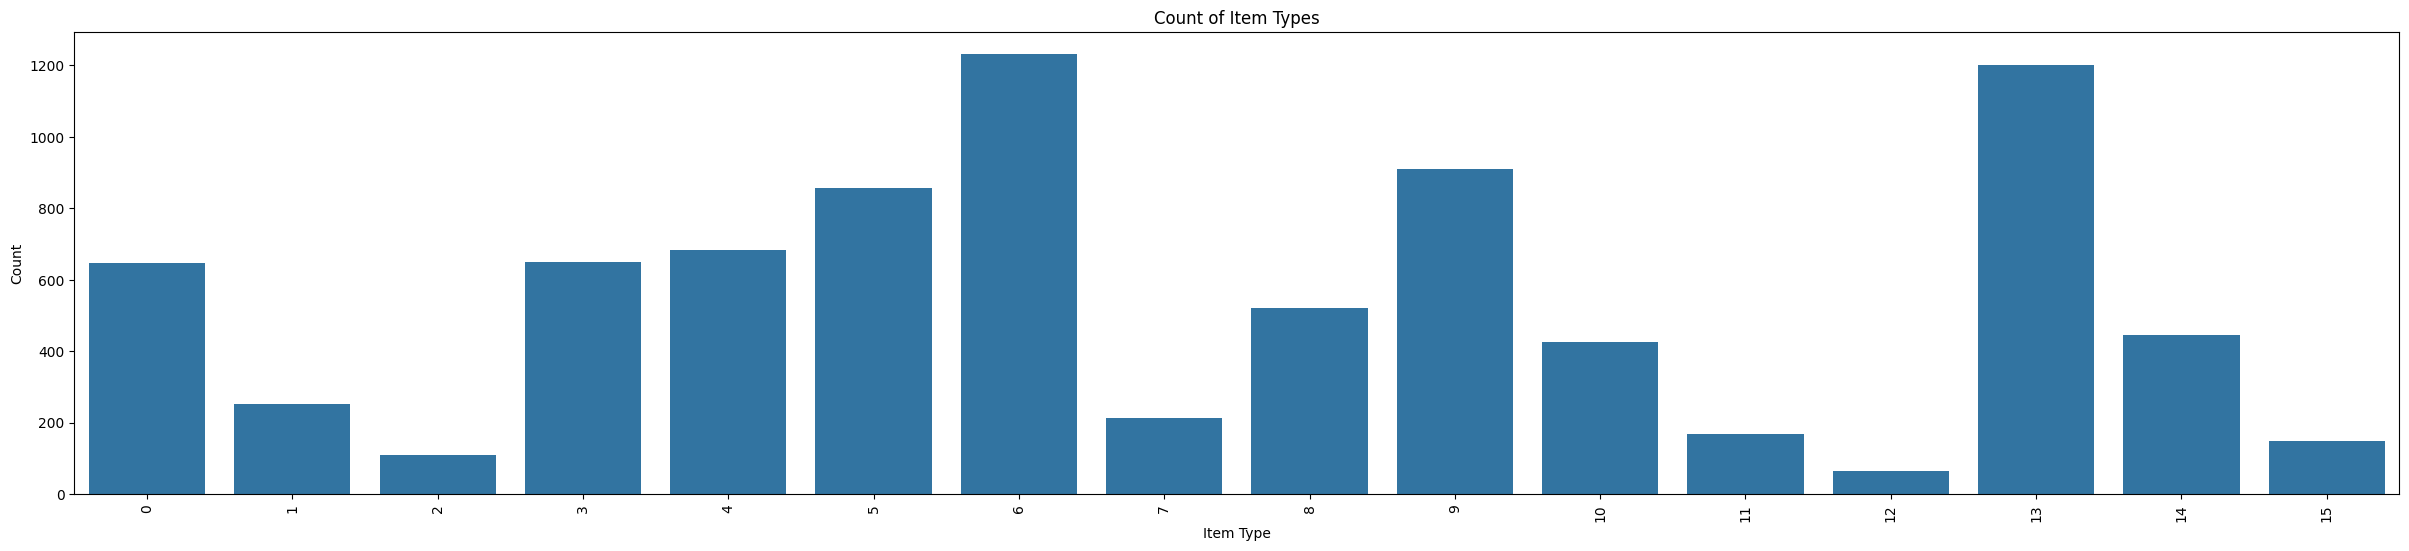

In [212]:
# Item Type distribution (Phân phối loại mặt hàng)
plt.figure(figsize=(30, 6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.title('Count of Item Types')  # Tiêu đề cho biểu đồ
plt.xlabel('Item Type')  # Nhãn trục x
plt.ylabel('Count')  # Nhãn trục y
plt.xticks(rotation=90)  # Xoay nhãn trục x cho dễ đọc
plt.show()


Chia dữ liệu thành dữ liệu huấn luyện và dữ liệu kiểm tra

In [213]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
# X chứa tất cả các đặc trưng (features), ngoại trừ cột 'Item_Outlet_Sales'
# Y chứa giá trị mục tiêu mà chúng ta muốn dự đoán (Item_Outlet_Sales)

# Tập dữ liệu sẽ được chia thành 80% cho huấn luyện và 20% cho kiểm tra
# random_state=2 đảm bảo rằng phân chia này có thể tái lập được

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [214]:
# In kích thước của các tập dữ liệu
# X.shape: Kích thước của tập dữ liệu gốc (tất cả các đặc trưng)
# X_train.shape: Kích thước của tập huấn luyện (80% của tập dữ liệu gốc)
# X_test.shape: Kích thước của tập kiểm tra (20% của tập dữ liệu gốc)

print(X.shape, X_train.shape, X_test.shape)


(8523, 7) (6818, 7) (1705, 7)


Huấn luyện mô hình máy học


XGBoost Regressor

In [215]:
# Khởi tạo một mô hình hồi quy XGBoost và lưu vào biến 'regressor'
regressor = XGBRegressor()


In [216]:
# Huấn luyện mô hình hồi quy XGBoost bằng cách sử dụng tập dữ liệu huấn luyện X_train và Y_train
regressor.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Đánh giá

In [217]:
# Dự đoán trên dữ liệu huấn luyện
training_data_prediction = regressor.predict(X_train)


In [218]:
# Tính giá trị R bình phương
r2_train = metrics.r2_score(Y_train, training_data_prediction)


In [219]:
# In giá trị R bình phương
print('R Squared value = ', r2_train)


R Squared value =  0.9999875368352873


In [220]:
# Dự đoán trên dữ liệu kiểm tra
test_data_prediction = regressor.predict(X_test)


In [221]:
# Giá trị R bình phương
r2_test = metrics.r2_score(Y_test, test_data_prediction)


In [222]:
print('R Squared value = ', r2_test)


R Squared value =  0.998244881933123


In [223]:
# Tính hiệu quả của mô hình
train_efficiency = r2_train * 100
test_efficiency = r2_test * 100

print(f"Hiệu quả mô hình trên dữ liệu huấn luyện: {train_efficiency:.2f}%")
print(f"Hiệu quả mô hình trên dữ liệu kiểm tra: {test_efficiency:.2f}%")

Hiệu quả mô hình trên dữ liệu huấn luyện: 100.00%
Hiệu quả mô hình trên dữ liệu kiểm tra: 99.82%


In [224]:
from pymongo import MongoClient

# Kết nối đến MongoDB (giả sử MongoDB đang chạy trên localhost)
client = MongoClient("mongodb://localhost:27017/")

# Chọn cơ sở dữ liệu và bộ sưu tập (collection)
db = client["big_mart_database"]  # Tên cơ sở dữ liệu
collection = db["big_mart_data"]  # Tên bộ sưu tập

# Chuyển DataFrame thành danh sách dictionary
data_dict = big_mart_data.to_dict("records")

# Lưu dữ liệu vào MongoDB
collection.insert_many(data_dict)
print("Dữ liệu đã được lưu vào MongoDB thành công!")

Dữ liệu đã được lưu vào MongoDB thành công!
